In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1XBcY92fA0CNMKMCZUaBBc7UN4iwIyqnhd7wJIepSGQA/export?format=csv'
df = pd.read_csv(url)

In [ ]:
# df = pd.read_csv('แบบสอบถามเพื่องานวิจัย Key To Ad (Responses) - Form Responses 1.csv')


In [ ]:
df.rename(columns={'เลือกประโยคโฆษณาที่ชอบมากที่สุด': 'เลือกประโยคโฆษณาที่ชอบมากที่สุด.0'}, inplace=True)

In [ ]:
for i in range(0, 15):
    df.rename(columns={f'เลือกประโยคโฆษณาที่ชอบมากที่สุด.{i}': f'F{((i)//3)+1}_{(i%3)+1}_ML'}, inplace=True)
for i in range(15, 31):
    df.rename(columns={f'เลือกประโยคโฆษณาที่ชอบมากที่สุด.{i}': f'C{(i-15)//3+1}_{(i-15)%3+1}_ML'}, inplace=True)

In [ ]:
df.rename(columns={df.columns[2]: 'Y_Y_N'}, inplace=True)
df.rename(columns={df.columns[3]: 'F1'}, inplace=True)
df.rename(columns={df.columns[7]: 'F2'}, inplace=True)
df.rename(columns={df.columns[11]: 'F3'}, inplace=True)
df.rename(columns={df.columns[15]: 'F4'}, inplace=True)
df.rename(columns={df.columns[19]: 'F5'}, inplace=True)
df.rename(columns={df.columns[23]: 'C1'}, inplace=True)
df.rename(columns={df.columns[27]: 'C2'}, inplace=True)
df.rename(columns={df.columns[31]: 'C3'}, inplace=True)
df.rename(columns={df.columns[35]: 'C4'}, inplace=True)
df.rename(columns={df.columns[39]: 'C5'}, inplace=True)

In [ ]:
!pip install gspread -q

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

sht2 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1cJllTWHFOOLbxckCautdDIxhp0bqZWSH0NaTnRixN1U/edit?usp=sharing')
worksheet = sht2.get_worksheet(2)
mapper = pd.DataFrame(worksheet.get_all_records())


In [ ]:
# mapper = pd.read_csv('https://docs.google.com/spreadsheets/d/1cJllTWHFOOLbxckCautdDIxhp0bqZWSH0NaTnRixN1U/export?format=csv')
#mapping data in F1-F5 and C1-C5 with mapper

for col in df.columns:
    for i, value in enumerate(df[col]):
        # Iterate over columns in mapper to find a match
        for col2 in mapper.columns:
            if value in mapper[col2].values:
                # If a match is found, replace the value in df with the corresponding column name from mapper
                df.at[i, col] = col2
                break


In [ ]:
mapper.head(10)

,WangChanGLM,OpenThaiGPT,Typhoon
0,เตียง ห้องนอนของคุณถูกออกแบบมาอย่างลงตัวด้วยเต...,เตียง สไตล์โมเดิร์น ขาทึบ หัวเตียงดูดีมีเอกลัก...,เตียง สไตล์โมเดิร์น ขาไม้ เตียงนอนเพื่อคุณภาพช...
1,แท่นวางมีดีไซน์คลาสสิกที่จะช่วยเพิ่มความโรแมนต...,แท่นวางเทียนหอม สร้างบรรยากาศสุดแสนโรแมนติคในม...,แท่นวางเทียมีสีสันที่ต่างกันออกไปตามธรรมชาติ จ...
2,เติมเต็มความอบอุ่นให้กับห้องนอน ด้วยพรม ผลิตจา...,ขนพรมหนาทอแน่น ให้สัมผัสนุ่มสบายเท้า และช่วยลด...,ทั้งสวยและนุ่ม สบาย ไม่ว่าเวลาเดินหรือนอนบนพรม...
3,ตู้เสื้อผ้าขนาดกะทัดรัต สามารถติดตั้งเข้ากับผน...,ชุด ผลิตจากวัสดุที่มีความแข็งแรงทนทาน รองรับน้...,สำหรับจัดเก็บเสื้อผ้า ตัวยาว ตัวสั้น และเสื้อค...
4,เทียนหอมกลิ่นชาเขียว กลิ่นหวานอมเปรี้ยวจากชาเข...,เทียนหอมช่วยสร้างบรรยากาศที่อ่อนโยนและอบอุ่นภา...,กลิ่นของบ้านคุณเป็นอย่างไร เทียนหอม ให้กลิ่นหอ...
5,คอนซีลเลอร์โทนชมพูสําหรับคนมีปัญหาจุดด่างดําเน...,คอนซีลเลอร์เนื้อบางเบาผสานเทคโนโลยีช่วยปกปิดจุ...,คอนซีลเลนอร์ครีมสูตรติดแน่นนานตลอดวันทาปุ๊บแห้...
6,บลัชเชอร์ส้มกุหลาบอันสดใสที่เหมาะกับทุกสีผิวช่...,บลัชเชอร์เนื้อเนียนละเอียด เม็ดสีแน่น เกลี่ยง่...,บลัชแอนด์ไฮไลท์ ปัดปุ๊ป สวยปั๊ด พร้อมเผยผิวสวย...
7,สเปรย์น้ําแร่ธรรมชาติ สูตรพิเศษผสานคุณค่าจากสก...,สเปรย์น้ํ้าหอมบำรุงเส้นผม ช่วยให้ผมมีน้ำหนัก จ...,สเปรย์ น้ำหอมสำหรับเส้นผม มอบสัมผัสกลิ่นหอมสู่...
8,แป้งผสมรองพื้นเนื้อแมทที่ดีที่สุดเหมาะสําหรับส...,แป้งเนื้อแมทที่ช่วยปรับผิวให้เรียบเนียนอย่างเป...,แป้งพัฟผสมรองพื้นเนื้อแมทสูตรอณูแป้งเล็กพิเศษเ...
9,มาสคาร่าเนื้อฟิล์มที่ช่วยให้ขนตางอนหนาและโค้งง...,มาสคาร่าสำหรับตาวิ้งค์ช่วยให้ขนตาแผ่เรียงเส้นส...,เพื่อขนตาที่งอนงามอย่างเป็นธรรมชาติกับมาสคาร่า...


In [ ]:
df

,Timestamp,Email Address,Y_Y_N,F1,F1_1_ML,F1_2_ML,F1_3_ML,F2,F2_1_ML,F2_2_ML,...,C3_3_ML,C4,C4_1_ML,C4_2_ML,C4_3_ML,C5,C5_1_ML,C5_2_ML,C5_3_ML,ข้อเสนอแนะ
0,2/7/2024 12:53:52,64015011@kmitl.ac.th,ใช่ ฉันเคยซื้อเครื่องสำอางค์ผ่านทางออนไลน์,OpenThaiGPT,NaN,OpenThaiGPT,NaN,WangChanGLM,แท่นวางเทียน เติมความโรแมนติกให้บ้านของคุณด้วย...,NaN,...,NaN,OpenThaiGPT,NaN,แป้งผสมรองพื้นเนื้อแมทเนื้อแป้งเนียนแน่นละเอีย...,NaN,Typhoon,มาสคาร่าสูตรที่รังสรรค์ขึ้นเพื่อเผยความมีเสน่ห...,NaN,NaN,NaN
1,2/7/2024 13:11:59,napas.pa@ku.th,ใช่ ฉันเคยซื้อเครื่องสำอางค์ผ่านทางออนไลน์,OpenThaiGPT,NaN,เตียง สไตล์โมเดิร์น สีเลกาโต้วอลนัทสวยสะดุดตาด...,NaN,OpenThaiGPT,NaN,OpenThaiGPT,...,WangChanGLM,Typhoon,แป้งผสมรองพื้นเนื้อแมทเนื้อแป้งเนียนแน่นละเอีย...,NaN,NaN,WangChanGLM,NaN,NaN,WangChanGLM,NaN
2,2/7/2024 13:49:55,64015117@kmitl.ac.th,"ใช่ ฉันเคยซื้อเฟอร์นิเจอร์ผ่านทางออนไลน์, ใช่ ...",Typhoon,NaN,NaN,Typhoon,WangChanGLM,WangChanGLM,NaN,...,ฉีดความมั่นใจในเสี้ยววินาทีกับสเปรย์น้ำหอมบำรุ...,WangChanGLM,NaN,NaN,WangChanGLM,Typhoon,Typhoon,NaN,NaN,เจี่ยม
3,2/7/2024 13:51:10,yooyoobit@gmail.com,"ใช่ ฉันเคยซื้อเฟอร์นิเจอร์ผ่านทางออนไลน์, ใช่ ...",WangChanGLM,เตียง สไตล์โมเดิร์น สีเลกาโต้วอลนัทสวยสะดุดตาด...,NaN,NaN,WangChanGLM,แท่นวางเทียน เติมความโรแมนติกให้บ้านของคุณด้วย...,NaN,...,NaN,WangChanGLM,NaN,NaN,แป้งผสมรองพื้นเนื้อแมทเนื้อแป้งเนียนแน่นละเอีย...,WangChanGLM,NaN,NaN,WangChanGLM,คำโฆษณาบางประโยคมีคีย์เวร์ดไม่ครบ แต่เป็นคำโฆษ...
4,2/7/2024 18:19:17,luksikapusayanawin@gmail.com,ใช่ ฉันเคยซื้อเครื่องสำอางค์ผ่านทางออนไลน์,OpenThaiGPT,NaN,เตียง สไตล์โมเดิร์น สีเลกาโต้วอลนัทสวยสะดุดตาด...,NaN,WangChanGLM,WangChanGLM,NaN,...,NaN,WangChanGLM,NaN,NaN,แป้งผสมรองพื้นเนื้อแมทเนื้อแป้งเนียนแน่นละเอีย...,Typhoon,Typhoon,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2/16/2024 20:37:35,benjaporn.be@gmail.com,ใช่ ฉันเคยซื้อเฟอร์นิเจอร์ผ่านทางออนไลน์,WangChanGLM,เตียง สไตล์โมเดิร์น สีเลกาโต้วอลนัทสวยสะดุดตาด...,NaN,NaN,OpenThaiGPT,NaN,OpenThaiGPT,...,NaN,OpenThaiGPT,NaN,OpenThaiGPT,NaN,Typhoon,มาสคาร่าสูตรที่รังสรรค์ขึ้นเพื่อเผยความมีเสน่ห...,NaN,NaN,NaN
96,2/16/2024 20:40:58,arisrayam74@gmail.com,ใช่ ฉันเคยซื้อเฟอร์นิเจอร์ผ่านทางออนไลน์,WangChanGLM,เตียง สไตล์โมเดิร์น สีเลกาโต้วอลนัทสวยสะดุดตาด...,NaN,NaN,OpenThaiGPT,NaN,แท่นวางเทียน เติมความโรแมนติกให้บ้านของคุณด้วย...,...,NaN,Typhoon,Typhoon,NaN,NaN,WangChanGLM,NaN,NaN,WangChanGLM,NaN
97,2/16/2024 20:41:45,sineiei2203@gmail.com,"ใช่ ฉันเคยซื้อเฟอร์นิเจอร์ผ่านทางออนไลน์, ใช่ ...",WangChanGLM,WangChanGLM,NaN,NaN,OpenThaiGPT,NaN,OpenThaiGPT,...,NaN,OpenThaiGPT,NaN,OpenThaiGPT,NaN,OpenThaiGPT,NaN,OpenThaiGPT,NaN,NaN
98,2/16/2024 20:42:57,pongthaweesresang@gmail.com,ใช่ ฉันเคยซื้อเฟอร์นิเจอร์ผ่านทางออนไลน์,Typhoon,NaN,NaN,Typhoon,WangChanGLM,WangChanGLM,NaN,...,NaN,OpenThaiGPT,NaN,OpenThaiGPT,NaN,Typhoon,Typhoon,NaN,NaN,NaN


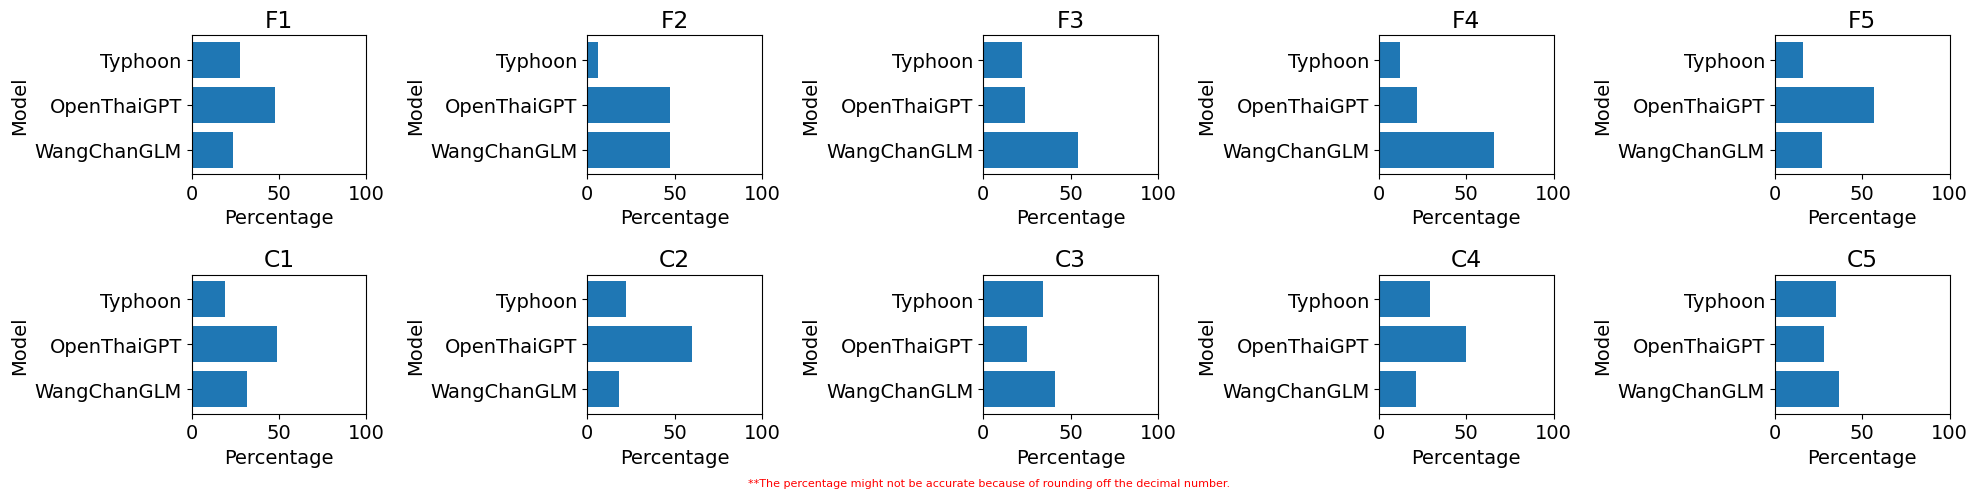

In [ ]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(20, 5))
#find percentage of each data in F1-F5 and C1-C5
labels = ['WangChanGLM', 'OpenThaiGPT', 'Typhoon']
for i in range(0, 5):
    per_f = (df[f'F{i+1}'].value_counts())
    per_f = per_f['WangChanGLM'], per_f['OpenThaiGPT'],per_f['Typhoon']
    plt.subplot(2, 5, i+1)
    plt.barh(labels, per_f)
    plt.xlim(0, 100)
    plt.xlabel('Percentage')
    plt.ylabel('Model')
    plt.title(f'F{i+1}')
for i in range(0, 5):
    per_c = (df[f'C{i+1}'].value_counts())
    per_c = per_c['WangChanGLM'], per_c['OpenThaiGPT'],per_c['Typhoon']
    plt.subplot(2, 5, i+6)
    plt.barh(labels, per_c)
    plt.xlim(0, 100)
    plt.xlabel('Percentage')
    plt.ylabel('Model')
    plt.title(f'C{i+1}')


#comment at bottom left
plt.figtext(0.5, 0.01, '**The percentage might not be accurate because of rounding off the decimal number.', fontsize=8, color='red', ha='center', va='center')
plt.tight_layout()
#plt.savefig('pie/PPP.png')
plt.show()


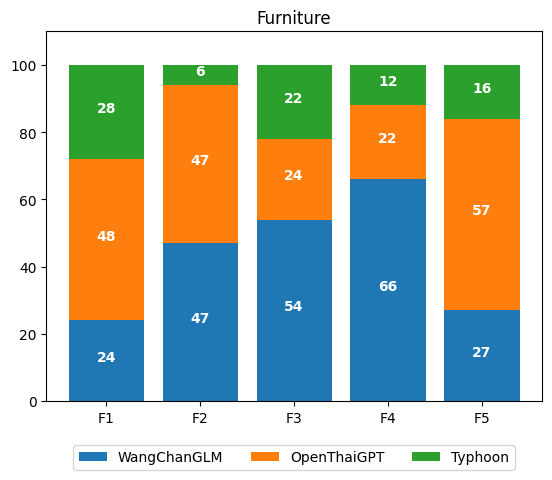

In [ ]:
f_x = []
f_l = []
f_m = []
for i in range(0, 5):
    per_f = (df[f'F{i+1}'].value_counts())
    f_x.append(per_f['WangChanGLM'])
    f_l.append(per_f['OpenThaiGPT'])
    f_m.append(per_f['Typhoon'])

ff = ['F1', 'F2', 'F3', 'F4', 'F5']
bottom_l = np.add(f_x, f_l).tolist()
fig, ax = plt.subplots()

ax.bar(ff, f_x, label='WangChanGLM')
ax.bar(ff, f_l, bottom=f_x, label='OpenThaiGPT')
ax.bar(ff, f_m, bottom=bottom_l, label='Typhoon')
plt.ylim(0, 110)
plt.title('Furniture')
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.savefig('bar/FPPP')
plt.show()

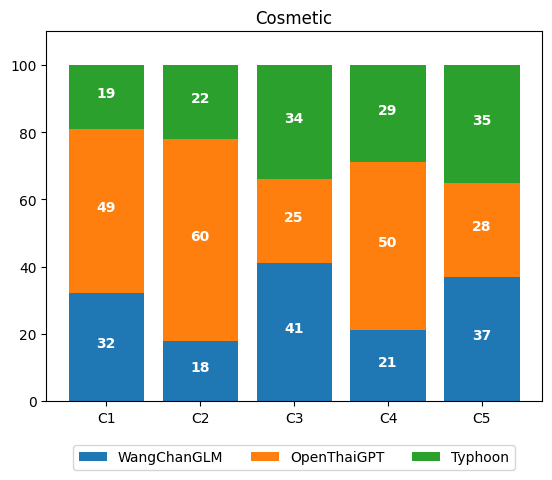

In [ ]:
c_x = []
c_l = []
c_m = []
for i in range(0, 5):
    per_c = (df[f'C{i+1}'].value_counts())
    c_x.append(per_c['WangChanGLM'])
    c_l.append(per_c['OpenThaiGPT'])
    c_m.append(per_c['Typhoon'])

cc = ['C1', 'C2', 'C3', 'C4', 'C5']
bottom_l = np.add(c_x, c_l).tolist()
fig, ax = plt.subplots()
ax.bar(cc, c_x, label='WangChanGLM')
ax.bar(cc, c_l, bottom=c_x, label='OpenThaiGPT')
ax.bar(cc, c_m, bottom=bottom_l, label='Typhoon')
plt.ylim(0, 110)
plt.title('Cosmetic')
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.savefig('bar/CPPP')
plt.show()

In [ ]:
def addlabels(x, y, width):
    for i in range(len(x)):
        plt.text(x[i] + width / 2, y[i] // 2, str(y[i]), ha='center',color='white')

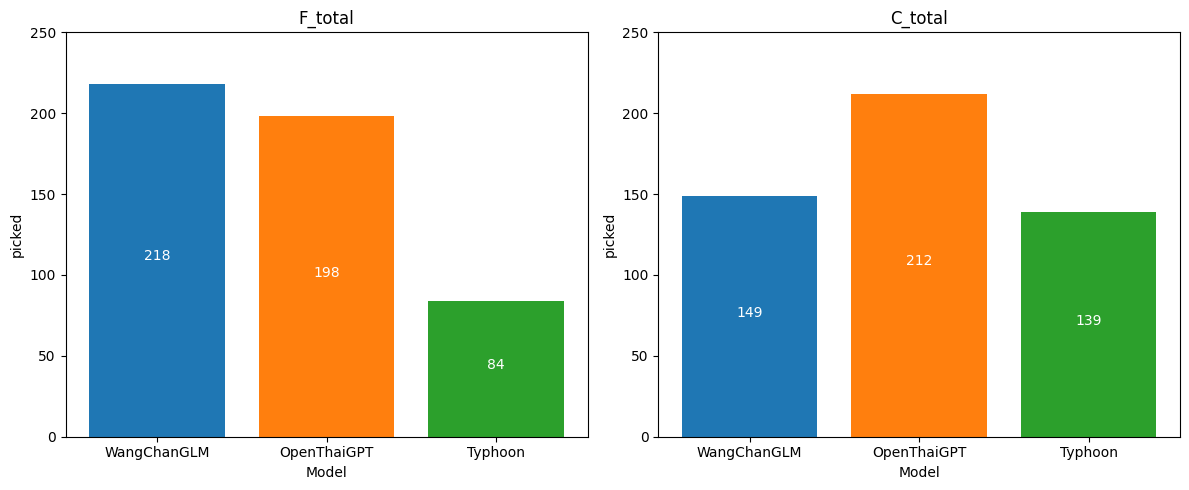

In [ ]:
F_total = pd.concat([df['F1'], df['F2'], df['F3'], df['F4'], df['F5']])
C_total = pd.concat([df['C1'], df['C2'], df['C3'], df['C4'], df['C5']])

F_total = F_total.value_counts()
C_total = C_total.value_counts()

F_total = F_total['WangChanGLM'], F_total['OpenThaiGPT'], F_total['Typhoon']
C_total = C_total['WangChanGLM'], C_total['OpenThaiGPT'], C_total['Typhoon']

labels = ['WangChanGLM', 'OpenThaiGPT', 'Typhoon']
x = range(len(labels))
color = ['#1f77b4','#ff7f0e','#2ca02c']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, F_total, color=color)
plt.ylim(0, 250)
plt.xlabel('Model')
plt.ylabel('picked')
plt.title('F_total')
addlabels(x, F_total,0)
plt.subplot(1, 2, 2)
plt.ylim(0, 250)
plt.bar(labels, C_total,color=color)
plt.title('C_total')
plt.xlabel('Model')
plt.ylabel('picked')
addlabels(x, C_total,0)
#comment at bottom left
plt.tight_layout()
plt.savefig('bar/F&C_total.png')
plt.show()




In [ ]:
for i in range(0, 5):
    df.loc[~df[f'F{i+1}_1_ML'].isnull() & (df[f'F{i+1}_1_ML'] != 'WangChanGLM'), f'F{i+1}_1_ML'] = 'Created by Human'
    df.loc[~df[f'F{i+1}_2_ML'].isnull() & (df[f'F{i+1}_2_ML'] != 'OpenThaiGPT'), f'F{i+1}_2_ML'] = 'Created by Human'
    df.loc[~df[f'F{i+1}_3_ML'].isnull() & (df[f'F{i+1}_3_ML'] != 'Typhoon'), f'F{i+1}_3_ML'] = 'Created by Human'

    df.loc[~df[f'C{i+1}_1_ML'].isnull() & (df[f'C{i+1}_1_ML'] != 'Typhoon'), f'C{i+1}_1_ML'] = 'Created by Human'
    df.loc[~df[f'C{i+1}_2_ML'].isnull() & (df[f'C{i+1}_2_ML'] != 'OpenThaiGPT'), f'C{i+1}_2_ML'] = 'Created by Human'
    df.loc[~df[f'C{i+1}_3_ML'].isnull() & (df[f'C{i+1}_3_ML'] != 'WangChanGLM'), f'C{i+1}_3_ML'] = 'Created by Human'




In [ ]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20, 15))

# Iterate over columns
for i in range(1, 6):
    # Calculate value counts as percentages
    counts_1 = df[f'F{i}_1_ML'].value_counts(normalize=True) * 100
    counts_2 = df[f'F{i}_2_ML'].value_counts(normalize=True) * 100
    counts_3 = df[f'F{i}_3_ML'].value_counts(normalize=True) * 100

    counts_1 = counts_1.reindex(['WangChanGLM', 'Created by Human'])
    counts_2 = counts_2.reindex(['OpenThaiGPT', 'Created by Human'])
    counts_3 = counts_3.reindex(['Typhoon', 'Created by Human'])

    # print(counts_1)
    # print(counts_2)
    # print(counts_3)


    labels1 = ['WangChanGLM', 'Created by Human']
    labels2 = ['OpenThaiGPT', 'Created by Human']
    labels3 = ['Typhoon', 'Created by Human']


    # Create subplots
    plt.subplot(1, 3, 1)
    plt.pie(counts_1, labels=labels1, autopct='%1.1f%%')
    plt.title(f'F{i}_1_ML')

    plt.subplot(1, 3, 2)
    plt.pie(counts_2, labels=labels2, autopct='%1.1f%%')
    plt.title(f'F{i}_2_ML')

    plt.subplot(1, 3, 3)
    plt.pie(counts_3, labels=labels3, autopct='%1.1f%%')
    plt.title(f'F{i}_3_ML')

# Adjust layout

    plt.tight_layout()
# Show the plot
    #plt.savefig(f'pie/FurFightHuman{i}.png')
    plt.show
    plt.clf()


<Figure size 2000x1500 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 15))

# Iterate over columns
for i in range(1, 6):
    # Calculate value counts as percentages
    counts_1 = df[f'C{i}_1_ML'].value_counts(normalize=True) * 100
    counts_2 = df[f'C{i}_2_ML'].value_counts(normalize=True) * 100
    counts_3 = df[f'C{i}_3_ML'].value_counts(normalize=True) * 100

    counts_1 = counts_1.reindex(['Typhoon', 'Created by Human'])
    counts_2 = counts_2.reindex(['OpenThaiGPT', 'Created by Human'])
    if len(counts_3) == 1:
        counts_3 = counts_3.reindex(['WangChanGLM'])
        labels3 = ['WangChanGLM']
    else:
        counts_3 = counts_3.reindex(['WangChanGLM', 'Created by Human'])
        labels3 = ['WangChanGLM', 'Created by Human']

    labels1 = ['Typhoon', 'Created by Human']
    labels2 = ['OpenThaiGPT', 'Created by Human']

    # Create subplots
    plt.subplot(1, 3, 1)
    plt.pie(counts_1, labels=labels1, autopct='%1.1f%%')
    plt.title(f'C{i}_1_ML')

    plt.subplot(1, 3, 2)
    plt.pie(counts_2, labels=labels2, autopct='%1.1f%%')
    plt.title(f'C{i}_2_ML')

    plt.subplot(1, 3, 3)
    plt.pie(counts_3, labels=labels3, autopct='%1.1f%%')
    plt.title(f'C{i}_3_ML')

#comment at the bottom left

    plt.tight_layout()
# Show the plot
    #plt.savefig(f'pie/CosFightHuman{i}.png')
    plt.clf()
print('Done')

Done


<Figure size 2000x1500 with 0 Axes>

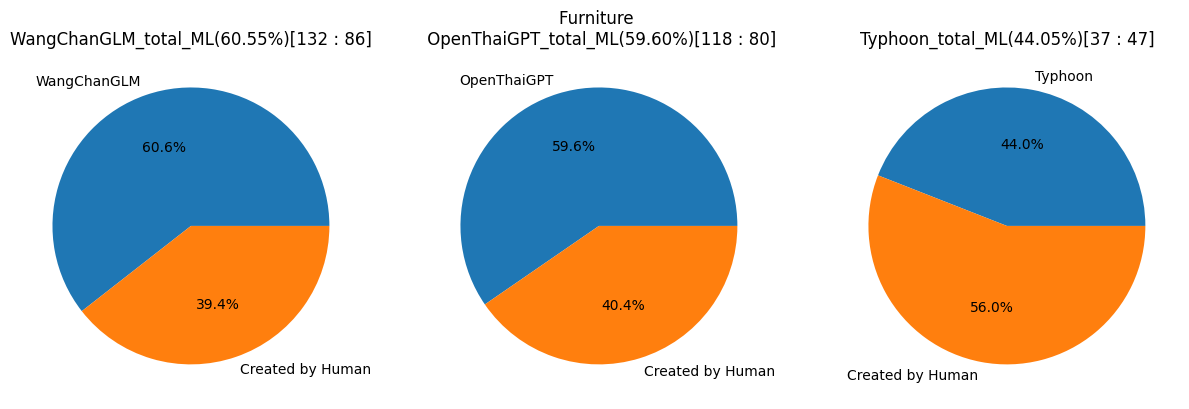

In [ ]:
WangChanGLM_total_ML = pd.concat([df['F1_1_ML'],df['F2_1_ML'],df['F3_1_ML'],df['F4_1_ML'],df['F5_1_ML']])
xm_t_count = WangChanGLM_total_ML.value_counts().get('WangChanGLM', 0)
xh_t_count = WangChanGLM_total_ML.value_counts().get('Created by Human', 0)
OpenThaiGPT_total_ML = pd.concat([df['F1_2_ML'],df['F2_2_ML'],df['F3_2_ML'],df['F4_2_ML'],df['F5_2_ML']])
lm_t_count = OpenThaiGPT_total_ML.value_counts().get('OpenThaiGPT', 0)
lh_t_count = OpenThaiGPT_total_ML.value_counts().get('Created by Human', 0)
Typhoon_total_ML = pd.concat([df['F1_3_ML'],df['F2_3_ML'],df['F3_3_ML'],df['F4_3_ML'],df['F5_3_ML']])
mm_t_count = Typhoon_total_ML.value_counts().get('Typhoon', 0)
mh_t_count = Typhoon_total_ML.value_counts().get('Created by Human', 0)


x_cal = WangChanGLM_total_ML.value_counts(normalize=True)*100
x_cal = x_cal.reindex(['WangChanGLM', 'Created by Human'])
x_calA = x_cal['WangChanGLM']

l_cal = OpenThaiGPT_total_ML.value_counts(normalize=True)*100
l_cal = l_cal.reindex(['OpenThaiGPT', 'Created by Human'])
l_calA = l_cal['OpenThaiGPT']


m_cal = Typhoon_total_ML.value_counts(normalize=True)*100
m_cal = m_cal.reindex(['Typhoon', 'Created by Human'])
m_calA = m_cal['Typhoon']

plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(12, 10))
plt.subplot(1, 3, 1)
plt.pie(x_cal, labels=x_cal.index, autopct='%1.1f%%')
plt.title(f'WangChanGLM_total_ML({x_calA:.2f}%)[{xm_t_count} : {xh_t_count}]')
plt.subplot(1, 3, 2)
plt.pie(l_cal, labels=l_cal.index, autopct='%1.1f%%')
plt.title(f'Furniture \n OpenThaiGPT_total_ML({l_calA:.2f}%)[{lm_t_count} : {lh_t_count}]')
plt.subplot(1, 3, 3)
plt.pie(m_cal, labels=m_cal.index, autopct='%1.1f%%')
plt.title(f'Typhoon_total_ML({m_calA:.2f}%)[{mm_t_count} : {mh_t_count}]')

plt.tight_layout()
#plt.savefig('pie/all_FurFightHuman.png')
plt.show()


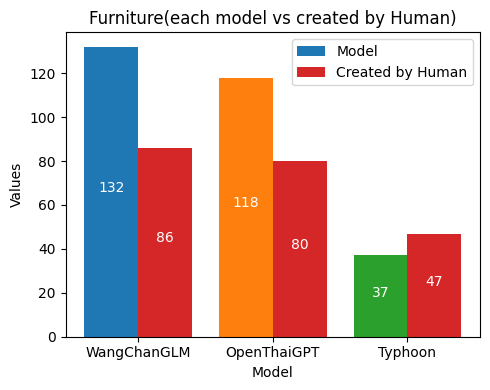

In [ ]:

WangChanGLM_total_ML = pd.concat([df['F1_1_ML'],df['F2_1_ML'],df['F3_1_ML'],df['F4_1_ML'],df['F5_1_ML']])
OpenThaiGPT_total_ML = pd.concat([df['F1_2_ML'],df['F2_2_ML'],df['F3_2_ML'],df['F4_2_ML'],df['F5_2_ML']])
Typhoon_total_ML = pd.concat([df['F1_3_ML'],df['F2_3_ML'],df['F3_3_ML'],df['F4_3_ML'],df['F5_3_ML']])


x_cal = WangChanGLM_total_ML.value_counts()
x_cal = x_cal.reindex(['WangChanGLM', 'Created by Human'])

l_cal = OpenThaiGPT_total_ML.value_counts()
l_cal = l_cal.reindex(['OpenThaiGPT', 'Created by Human'])

m_cal = Typhoon_total_ML.value_counts()
m_cal = m_cal.reindex(['Typhoon', 'Created by Human'])

cat = ['WangChanGLM','OpenThaiGPT','Typhoon']


l1 = [x_cal[0], l_cal[0], m_cal[0]]
l2 = [x_cal[1], l_cal[1], m_cal[1]]
x = range(len(cat))

color = ['#1f77b4','#ff7f0e','#2ca02c']

plt.figure(figsize=(5, 4))
plt.bar(x, l1, width=0.4, label='Model', color= color)
plt.bar([i + 0.4 for i in x], l2, width=0.4, label='Created by Human', color='#d62728')
plt.title('Furniture(each model vs created by Human)')

plt.xlabel('Model')
plt.ylabel('Values')
plt.xticks([i + 0.2 for i in x], cat)

addlabels(x, l1,0)
# Call addlabels function to add value labels on top of the "Created by Human" bars
addlabels([i + 0.4 for i in x], l2, 0)
plt.tight_layout()
plt.legend()
plt.savefig('bar/all_FurFightHuman.png')
plt.show()

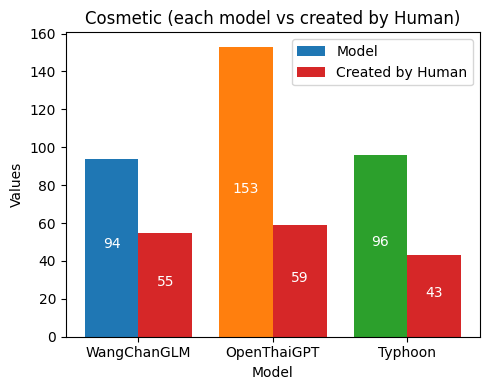

In [ ]:


# Your existing data manipulation code
WangChanGLM_total_ML = pd.concat([df['C1_3_ML'], df['C2_3_ML'], df['C3_3_ML'], df['C4_3_ML'], df['C5_3_ML']])
OpenThaiGPT_total_ML = pd.concat([df['C1_2_ML'], df['C2_2_ML'], df['C3_2_ML'], df['C4_2_ML'], df['C5_2_ML']])
Typhoon_total_ML = pd.concat([df['C1_1_ML'], df['C2_1_ML'], df['C3_1_ML'], df['C4_1_ML'], df['C5_1_ML']])

x_cal = WangChanGLM_total_ML.value_counts()
x_cal = x_cal.reindex(['WangChanGLM', 'Created by Human'])

l_cal = OpenThaiGPT_total_ML.value_counts()
l_cal = l_cal.reindex(['OpenThaiGPT', 'Created by Human'])

m_cal = Typhoon_total_ML.value_counts()
m_cal = m_cal.reindex(['Typhoon', 'Created by Human'])

l1 = [x_cal[0], l_cal[0], m_cal[0]]
l2 = [x_cal[1], l_cal[1], m_cal[1]]
x = range(len(cat))

# Define your categories
cat = ['WangChanGLM', 'OpenThaiGPT', 'Typhoon']

# Define your color
color = ['#1f77b4','#ff7f0e','#2ca02c']

# Plotting
plt.figure(figsize=(5, 4))
plt.bar(x, l1, width=0.4, label='Model', color=color)
plt.bar([i + 0.4 for i in x], l2, width=0.4, label='Created by Human', color='#d62728')
plt.title('Cosmetic (each model vs created by Human)')
plt.xlabel('Model')
plt.ylabel('Values')
plt.xticks([i + 0.2 for i in x], cat)
plt.tight_layout()

addlabels(x, l1,0)
# Call addlabels function to add value labels on top of the "Created by Human" bars
addlabels([i + 0.4 for i in x], l2, 0)

plt.legend()
#plt.savefig('bar/all_CosFightHuman.png')
plt.show()


96
43


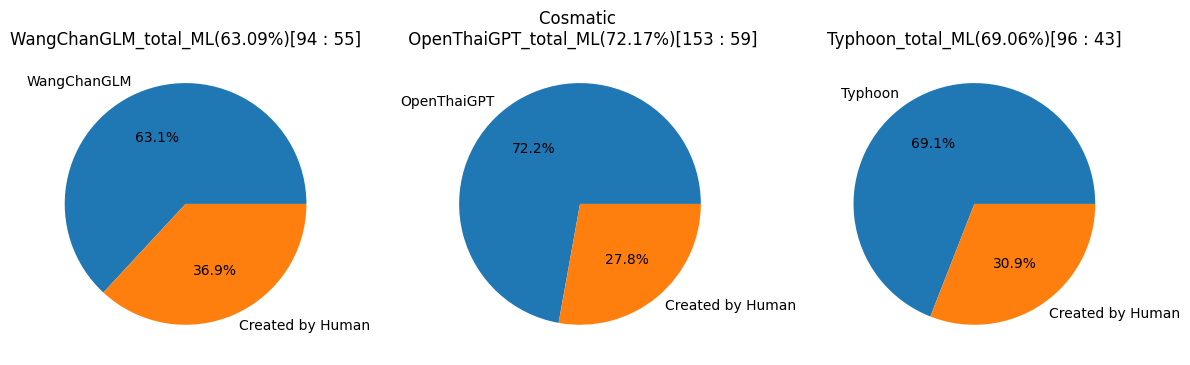

In [ ]:
WangChanGLM_total_ML = pd.concat([df['C1_3_ML'],df['C2_3_ML'],df['C3_3_ML'],df['C4_3_ML'],df['C5_3_ML']])
xm_t_count = WangChanGLM_total_ML.value_counts().get('WangChanGLM', 0)
xh_t_count = WangChanGLM_total_ML.value_counts().get('Created by Human', 0)
OpenThaiGPT_total_ML = pd.concat([df['C1_2_ML'],df['C2_2_ML'],df['C3_2_ML'],df['C4_2_ML'],df['C5_2_ML']])
lm_t_count = OpenThaiGPT_total_ML.value_counts().get('OpenThaiGPT', 0)
lh_t_count = OpenThaiGPT_total_ML.value_counts().get('Created by Human', 0)
Typhoon_total_ML = pd.concat([df['C1_1_ML'],df['C2_1_ML'],df['C3_1_ML'],df['C4_1_ML'],df['C5_1_ML']])
mm_t_count = Typhoon_total_ML.value_counts().get('Typhoon', 0)
mh_t_count = Typhoon_total_ML.value_counts().get('Created by Human', 0)

x_cal = WangChanGLM_total_ML.value_counts(normalize=True)*100
x_cal = x_cal.reindex(['WangChanGLM', 'Created by Human'])
x_calA = x_cal['WangChanGLM']

l_cal = OpenThaiGPT_total_ML.value_counts(normalize=True)*100
l_cal = l_cal.reindex(['OpenThaiGPT', 'Created by Human'])
l_calA = l_cal['OpenThaiGPT']


m_cal = Typhoon_total_ML.value_counts(normalize=True)*100
m_cal = m_cal.reindex(['Typhoon', 'Created by Human'])
m_calA = m_cal['Typhoon']

print(Typhoon_total_ML.value_counts().get('Typhoon', 0))
print(Typhoon_total_ML.value_counts().get('Created by Human', 0))

plt.figure(figsize=(12, 10))
plt.subplot(1, 3, 1)
plt.pie(x_cal, labels=x_cal.index, autopct='%1.1f%%')
plt.title(f'WangChanGLM_total_ML({x_calA:.2f}%)[{xm_t_count} : {xh_t_count}]')
plt.subplot(1, 3, 2)
plt.pie(l_cal, labels=l_cal.index, autopct='%1.1f%%')
plt.title(f'Cosmatic \n OpenThaiGPT_total_ML({l_calA:.2f}%)[{lm_t_count} : {lh_t_count}]')
plt.subplot(1, 3, 3)
plt.pie(m_cal, labels=m_cal.index, autopct='%1.1f%%')
plt.title(f'Typhoon_total_ML({m_calA:.2f}%)[{mm_t_count} : {mh_t_count}]')
plt.tight_layout()
#plt.savefig('pie/all_CosFightHuman.png')
plt.show()


In [ ]:
!mkdir bar
!zip -r bar.zip bar


  adding: bar/ (stored 0%)
  adding: bar/CPPP.png (deflated 12%)
  adding: bar/F&C_total.png (deflated 20%)
  adding: bar/FPPP.png (deflated 12%)
